### Приклад 1. Геометричний зміст похідної

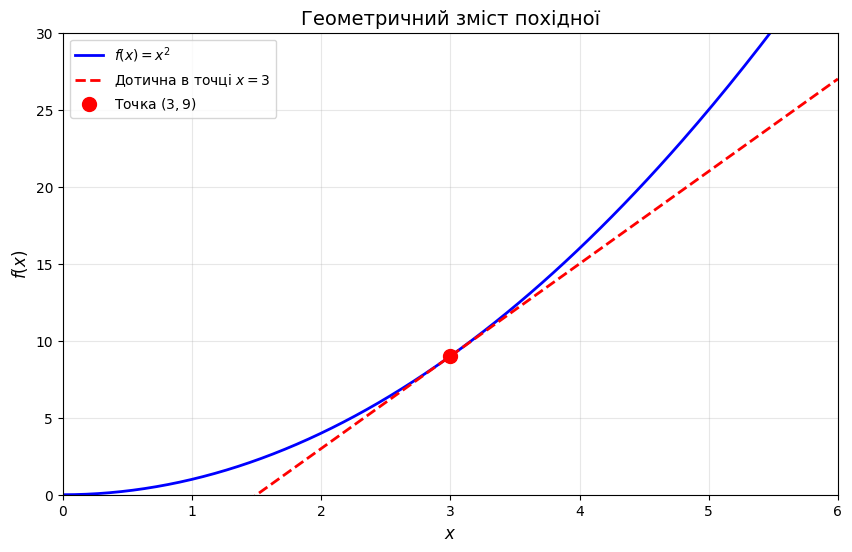

Похідна f'(3) = 6
Рівняння дотичної: y = 6x - 9


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функція f(x) = x^2
def f(x):
    return x**2

# Точка, в якій будуємо дотичну
x_point = 3
y_point = f(x_point)

# Похідна f'(3) = 6 (обчислили вище)
derivative = 6

# Рівняння дотичної: y = 6(x - 3) + 9 = 6x - 9
def tangent(x):
    return derivative * (x - x_point) + y_point

# Побудова графіка
x = np.linspace(0, 6, 200)
y = f(x)
y_tangent = tangent(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='$f(x) = x^2$')
plt.plot(x, y_tangent, 'r--', linewidth=2, label=f'Дотична в точці $x={x_point}$')
plt.plot(x_point, y_point, 'ro', markersize=10, label=f'Точка $({x_point}, {y_point})$')

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$f(x)$', fontsize=12)
plt.title('Геометричний зміст похідної', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xlim(0, 6)
plt.ylim(0, 30)
plt.show()

print(f"Похідна f'({x_point}) = {derivative}")
print(f"Рівняння дотичної: y = {derivative}x - 9")

### Приклад 2. Ручна реалізація методу forward difference

In [ ]:
import numpy as np

def numerical_derivative(f, x, h=1e-5):
    """
    Чисельне обчислення похідної функції f в точці x методом forward difference
    """
    return (f(x + h) - f(x)) / h

# Функція f(x) = sin(x)
f = np.sin
x_point = np.pi / 4

# Аналітична похідна: f'(x) = cos(x)
f_prime_analytic = np.cos(x_point)

# Чисельна похідна
f_prime_numerical = numerical_derivative(f, x_point)

print(f"Аналітична похідна f'(π/4) = {f_prime_analytic:.10f}")
print(f"Чисельна похідна f'(π/4) ≈ {f_prime_numerical:.10f}")
print(f"Абсолютна похибка: {abs(f_prime_analytic - f_prime_numerical):.2e}")


Аналітична похідна f'(π/4) = 0.7071067812
Чисельна похідна f'(π/4) ≈ 0.7071032456
Абсолютна похибка: 3.54e-06


### Приклад 3. Дослідження похибки залежно від кроку $h$

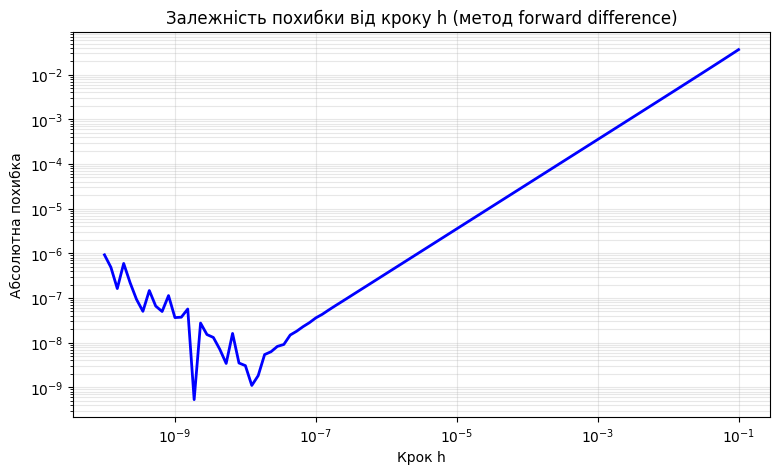

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def numerical_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

f = np.sin
x_point = np.pi / 4
f_prime_analytic = np.cos(x_point)

# Перевіримо широкий діапазон значень h
h_values = np.logspace(-10, -1, 100)
errors = []

for h in h_values:
    f_prime_num = numerical_derivative(f, x_point, h)
    error = abs(f_prime_num - f_prime_analytic)
    errors.append(error)

plt.figure(figsize=(9, 5))
plt.loglog(h_values, errors, 'b-', linewidth=2)
plt.xlabel('Крок h')
plt.ylabel('Абсолютна похибка')
plt.title('Залежність похибки від кроку h (метод forward difference)')
plt.grid(True, which='both', alpha=0.3)
plt.show()

### Приклад 4. Використання SciPy для чисельного диференціювання

In [ ]:
from scipy.optimize import approx_fprime

# Функція
def f(x):
    """Функція для диференціювання"""
    return np.sin(x[0])  # x — це масив, беремо перший елемент

x_point = np.array([np.pi / 4])  # Обгортаємо в масив

# Чисельна похідна через SciPy
# epsilon — крок для обчислення похідної
f_prime_scipy = approx_fprime(x_point, f, epsilon=1e-5)[0]

# Аналітична похідна
f_prime_analytic = np.cos(np.pi / 4)

print(f"Аналітична похідна: {f_prime_analytic:.10f}")
print(f"SciPy похідна: {f_prime_scipy:.10f}")
print(f"Похибка: {abs(f_prime_analytic - f_prime_scipy):.2e}")

Аналітична похідна: 0.7071067812
SciPy похідна: 0.7071032456
Похибка: 3.54e-06


In [ ]:
from scipy.optimize import approx_fprime

# Функція, що приймає скаляр
def f_scalar(x):
    return np.sin(x)

# Обгортка для approx_fprime
def f_vector(x):
    return f_scalar(x[0])

x_point = np.array([np.pi / 4])
f_prime = approx_fprime(x_point, f_vector, epsilon=1e-5)[0]

print(f"Похідна: {f_prime:.10f}")

Похідна: 0.7071032456


### Приклад 5. Охолодження кави

[[90.         89.30117056 88.60931769 87.92437141 87.24626287 86.574924
  85.91028736 85.25228615 84.60085416 83.95592583 83.31743623 82.68532104
  82.05951657 81.43995976 80.82658817 80.21933999 79.61815404 79.02296974
  78.43372717 77.85031966 77.27257085 76.70042936 76.13385067 75.57279044
  75.01720444 74.46704865 73.92227916 73.38285222 72.84872424 72.31985178
  71.79619156 71.27770043 70.76433541 70.25605367 69.75281252 69.25456944
  68.76128206 68.27290815 67.78940563 67.31073259 66.83684726 66.36770802
  65.90327342 65.44350213 64.98835301 64.53778504 64.09175737 63.6502293
  63.21316027 62.7805099  62.35223792 61.92830426 61.50866896 61.09329224
  60.68213445 60.27515613 59.87231792 59.47358065 59.07890529 58.68825297
  58.30158495 57.91886268 57.54004771 57.1651018  56.79398682 56.4266648
  56.06309795 55.70324859 55.34707921 54.99455247 54.64563117 54.30027824
  53.95845679 53.62013007 53.28526149 52.95381461 52.62575313 52.30104093
  51.979642   51.66152052 51.3466408  51.0

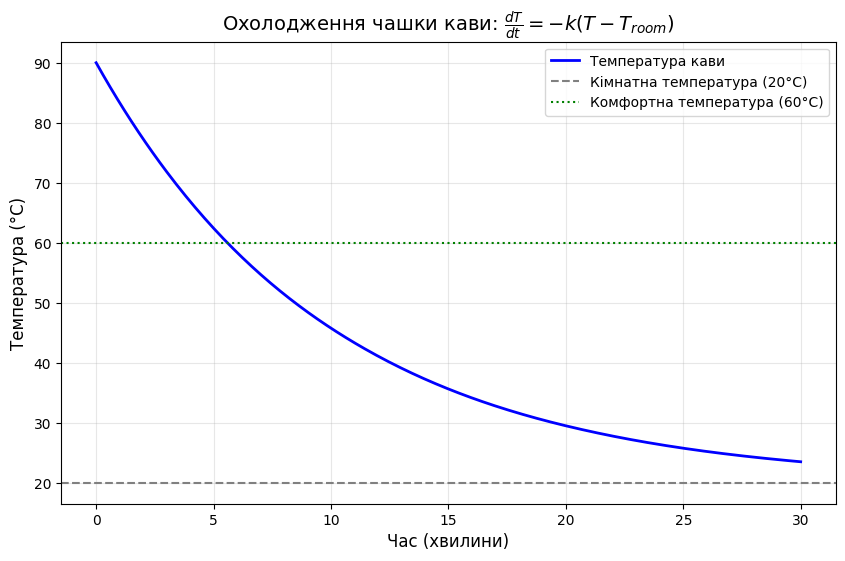

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметри
T0 = 90  # початкова температура (°C)
T_room = 20  # кімнатна температура (°C)
k = 0.1  # коефіцієнт охолодження (1/хв)
t_span = (0, 30)  # інтервал часу (хв)

# Диференціальне рівняння: dT/dt = -k(T - T_room)
def cooling(t, T):
    return -k * (T - T_room)

# Розв'язання
solution = solve_ivp(cooling, t_span, [T0], dense_output=True)
times = np.linspace(0, 30, 300)
temperatures = solution.sol(times)[0]
print(solution.sol(times))
# print(temperatures)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(times, temperatures, 'b-', linewidth=2, label='Температура кави')
plt.axhline(y=T_room, color='gray', linestyle='--', label=f'Кімнатна температура ({T_room}°C)')
plt.axhline(y=60, color='green', linestyle=':', label='Комфортна температура (60°C)')
plt.xlabel('Час (хвилини)', fontsize=12)
plt.ylabel('Температура (°C)', fontsize=12)
plt.title('Охолодження чашки кави: $\\frac{dT}{dt} = -k(T - T_{room})$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

### Приклад 6. Вірусний пост

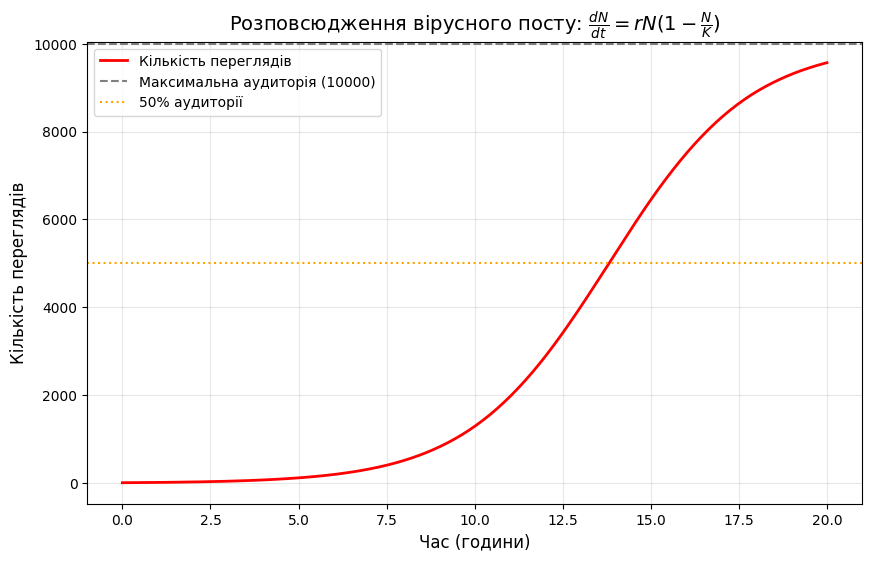

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Параметри
N0 = 10  # початкова кількість переглядів
r = 0.5  # швидкість розповсюдження
K = 10000  # максимальна аудиторія
t_span = (0, 20)  # інтервал часу (години)

# Диференціальне рівняння: dN/dt = r * N * (1 - N/K)
def viral_spread(t, N):
    return r * N * (1 - N / K)

# Розв'язання
solution = solve_ivp(viral_spread, t_span, [N0], dense_output=True)
times = np.linspace(0, 20, 300)
views = solution.sol(times)[0]

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(times, views, 'r-', linewidth=2, label='Кількість переглядів')
plt.axhline(y=K, color='gray', linestyle='--', label=f'Максимальна аудиторія ({K})')
plt.axhline(y=K*0.5, color='orange', linestyle=':', label='50% аудиторії')
plt.xlabel('Час (години)', fontsize=12)
plt.ylabel('Кількість переглядів', fontsize=12)
plt.title('Розповсюдження вірусного посту: $\\frac{dN}{dt} = rN(1 - \\frac{N}{K})$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

### Приклад 7. Чисельне розв\'язання охолодження кави

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Параметри задачі
T0 = 90  # початкова температура (°C)
T_room = 20  # кімнатна температура (°C)
k = 0.1  # коефіцієнт охолодження (1/хв)

# Диференціальне рівняння: dT/dt = -k(T - T_room)
def cooling(t, T):
    return -k * (T - T_room)

# Розв'язання задачі
t_span = (0, 30)  # інтервал часу від 0 до 30 хвилин
solution = solve_ivp(cooling, t_span, [T0], dense_output=True)

# Отримання значень температури в конкретні моменти часу
times = np.array([0, 5, 10, 15, 20, 25, 30])
temperatures = solution.sol(times)[0]

print("Час (хв) | Температура (°C)")
print("-" * 30)
for t, temp in zip(times, temperatures):
    print(f"{t:8.1f} | {temp:16.2f}")

Час (хв) | Температура (°C)
------------------------------
     0.0 |            90.00
     5.0 |            62.42
    10.0 |            45.76
    15.0 |            35.62
    20.0 |            29.49
    25.0 |            25.75
    30.0 |            23.49


In [ ]:
print(solution.sol(times)[0])
print(solution.sol(times))

[90.         62.42331423 45.76169975 35.62482239 29.48828392 25.75192554
 23.4933898 ]
[[90.         62.42331423 45.76169975 35.62482239 29.48828392 25.75192554
  23.4933898 ]]


### Приклад 8. Розповсюдження вірусного посту

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

# Параметри задачі
N0 = 10  # початкова кількість переглядів
r = 0.5  # швидкість розповсюдження
K = 10000  # максимальна аудиторія

# Диференціальне рівняння: dN/dt = r * N * (1 - N/K)
def viral_spread(t, N):
    return r * N * (1 - N / K)

# Розв'язання задачі
t_span = (0, 20)  # інтервал часу від 0 до 20 годин
solution = solve_ivp(viral_spread, t_span, [N0], dense_output=True)

# Отримання значень у конкретні моменти часу
times = np.array([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
views = solution.sol(times)[0]

print("Час (год) | Кількість переглядів")
print("-" * 35)
for t, n in zip(times, views):
    print(f"{t:9.0f} | {n:20.0f}")

# Час до досягнення різних рівнів охоплення
times_dense = np.linspace(0, 20, 1000)
views_dense = solution.sol(times_dense)[0]

for threshold in [0.1, 0.5, 0.9]:
    idx = np.argmax(views_dense >= threshold * K)
    if idx > 0:
        print(f"{int(threshold*100)}% аудиторії досягнуто за {times_dense[idx]:.2f} годин")

Час (год) | Кількість переглядів
-----------------------------------
        0 |                   10
        2 |                   27
        4 |                   73
        6 |                  197
        8 |                  518
       10 |                 1292
       12 |                 2879
       14 |                 5236
       16 |                 7495
       18 |                 8908
       20 |                 9567
10% аудиторії досягнуто за 9.43 годин
50% аудиторії досягнуто за 13.81 годин
90% аудиторії досягнуто за 18.20 годин


### Приклад 9. Візуалізація функції $f(x, y) = x^2 + y^2$

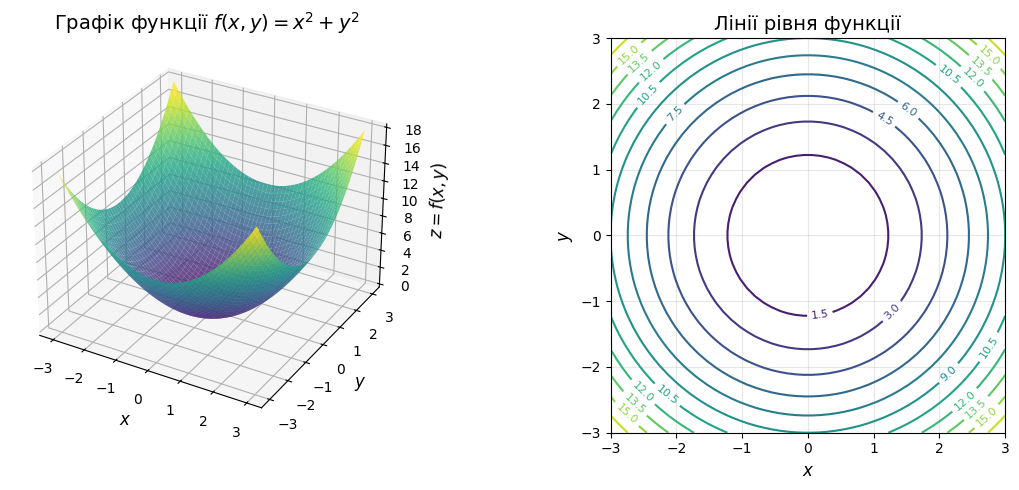

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функція f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Створення сітки точок
x = np.linspace(-3, 3, 50)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Побудова 3D поверхні
fig = plt.figure(figsize=(12, 5))

# Перший графік — 3D поверхня
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_zlabel('$z = f(x,y)$', fontsize=12)
ax1.set_title('Графік функції $f(x,y) = x^2 + y^2$', fontsize=14)

# Другий графік — contour plot (лінії рівня)
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=15, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$y$', fontsize=12)
ax2.set_title('Лінії рівня функції', fontsize=14)
ax2.set_aspect('equal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Приклад 10. Візуалізація зрізів поверхні

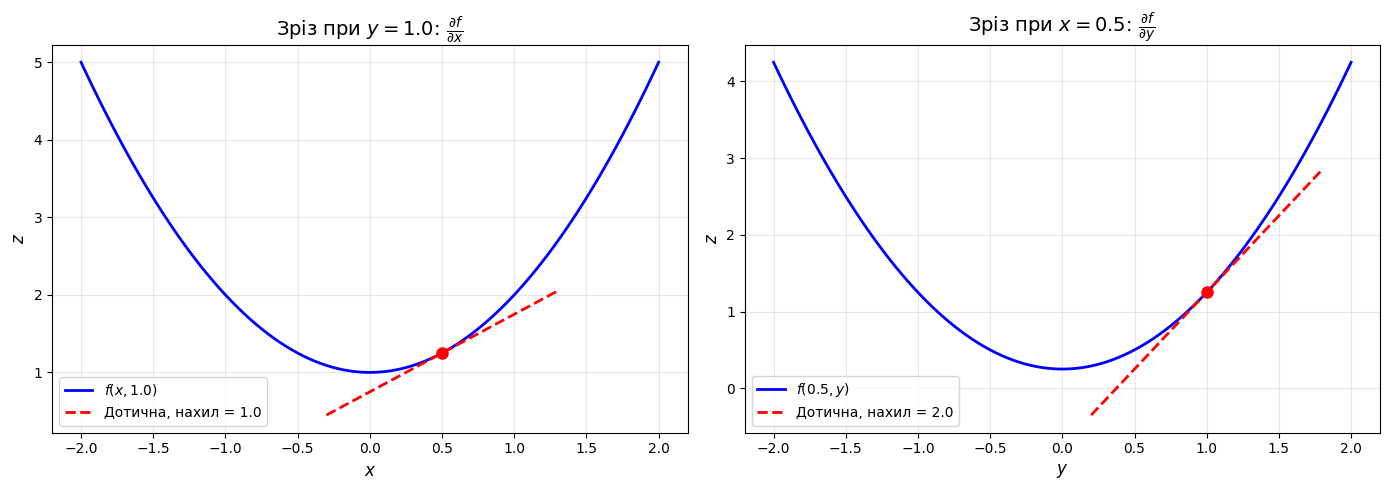

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функція f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Частинні похідні
def df_dx(x, y):
    return 2*x

def df_dy(x, y):
    return 2*y

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Графік 1: зріз при y = 1
y_fixed = 1.0
x_slice = np.linspace(-2, 2, 100)
z_slice = f(x_slice, y_fixed)

ax1.plot(x_slice, z_slice, 'b-', linewidth=2, label=f'$f(x, {y_fixed})$')
x_point = 0.5
z_point = f(x_point, y_fixed)
slope = df_dx(x_point, y_fixed)

# Дотична
x_tangent = np.linspace(x_point - 0.8, x_point + 0.8, 50)
z_tangent = z_point + slope * (x_tangent - x_point)
ax1.plot(x_tangent, z_tangent, 'r--', linewidth=2, label=f'Дотична, нахил = {slope:.1f}')
ax1.plot(x_point, z_point, 'ro', markersize=8)

ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$z$', fontsize=12)
ax1.set_title(f'Зріз при $y = {y_fixed}$: $\\frac{{\\partial f}}{{\\partial x}}$', fontsize=14)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=10)

# Графік 2: зріз при x = 0.5
x_fixed = 0.5
y_slice = np.linspace(-2, 2, 100)
z_slice = f(x_fixed, y_slice)

ax2.plot(y_slice, z_slice, 'b-', linewidth=2, label=f'$f({x_fixed}, y)$')
y_point = 1.0
z_point = f(x_fixed, y_point)
slope = df_dy(x_fixed, y_point)

# Дотична
y_tangent = np.linspace(y_point - 0.8, y_point + 0.8, 50)
z_tangent = z_point + slope * (y_tangent - y_point)
ax2.plot(y_tangent, z_tangent, 'r--', linewidth=2, label=f'Дотична, нахил = {slope:.1f}')
ax2.plot(y_point, z_point, 'ro', markersize=8)

ax2.set_xlabel('$y$', fontsize=12)
ax2.set_ylabel('$z$', fontsize=12)
ax2.set_title(f'Зріз при $x = {x_fixed}$: $\\frac{{\\partial f}}{{\\partial y}}$', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()

### Приклад 11. Візуалізація поверхні з зрізами

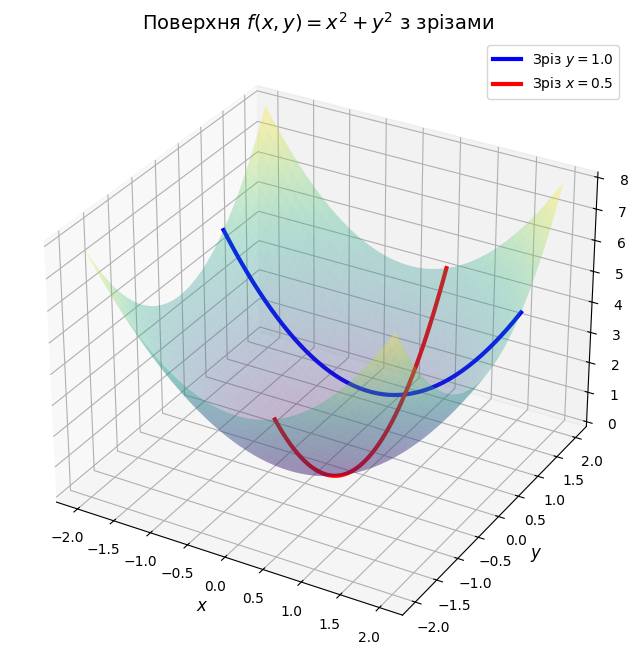

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функція f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Створення сітки
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Поверхня
ax.plot_surface(X, Y, Z, alpha=0.3, cmap='viridis')

# Зріз при y = 1
y_fixed = 1.0
x_plane = np.linspace(-2, 2, 50)
y_plane = np.full_like(x_plane, y_fixed)
z_plane = f(x_plane, y_plane)
ax.plot(x_plane, y_plane, z_plane, 'b-', linewidth=3, label=f'Зріз $y={y_fixed}$')

# Зріз при x = 0.5
x_fixed = 0.5
y_plane2 = np.linspace(-2, 2, 50)
x_plane2 = np.full_like(y_plane2, x_fixed)
z_plane2 = f(x_plane2, y_plane2)
ax.plot(x_plane2, y_plane2, z_plane2, 'r-', linewidth=3, label=f'Зріз $x={x_fixed}$')

ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('$y$', fontsize=12)
ax.set_zlabel('$z$', fontsize=12)
ax.set_title('Поверхня $f(x,y) = x^2 + y^2$ з зрізами', fontsize=14)
ax.legend(fontsize=10)

plt.show()

### Приклад 12. Частинні похідні функції $f(x, y) = x^2 + y^2
$ в точці $(1, 2)$

In [ ]:
import numpy as np
from scipy.optimize import approx_fprime

# Функція f(x, y) = x^2 + y^2
def f(coords):
    x, y = coords
    return x**2 + y**2

# Точка, в якій обчислюємо частинні похідні
point = np.array([1.0, 2.0])

# Чисельне обчислення градієнта
epsilon = 1e-8
gradient_numerical = approx_fprime(point, f, epsilon)

print("Чисельні частинні похідні:")
print(f"∂f/∂x(1, 2) ≈ {gradient_numerical[0]:.10f}")
print(f"∂f/∂y(1, 2) ≈ {gradient_numerical[1]:.10f}")


Чисельні частинні похідні:
∂f/∂x(1, 2) ≈ 2.0000000000
∂f/∂y(1, 2) ≈ 4.0000000000


### Приклад 13. Частинні похідні функції $f(x, y) = x^3 y^2 + 2xy + 5$  в точці $(2, 3)$.

In [ ]:
import numpy as np
from scipy.optimize import approx_fprime

# Функція f(x, y) = x^3*y^2 + 2*x*y + 5
def f(coords):
    x, y = coords
    return x**3 * y**2 + 2*x*y + 5

# Точка, в якій обчислюємо похідні
point = np.array([2.0, 3.0])

# Чисельне обчислення частинних похідних
epsilon = 1e-8
partial_derivatives = approx_fprime(point, f, epsilon)

print(f"\nЧисельні частинні похідні:")
print(f"∂f/∂x = {partial_derivatives[0]:.6f}")
print(f"∂f/∂y = {partial_derivatives[1]:.6f}")


Чисельні частинні похідні:
∂f/∂x = 114.000000
∂f/∂y = 52.000000


### Приклад 14. Візуалізація градієнта

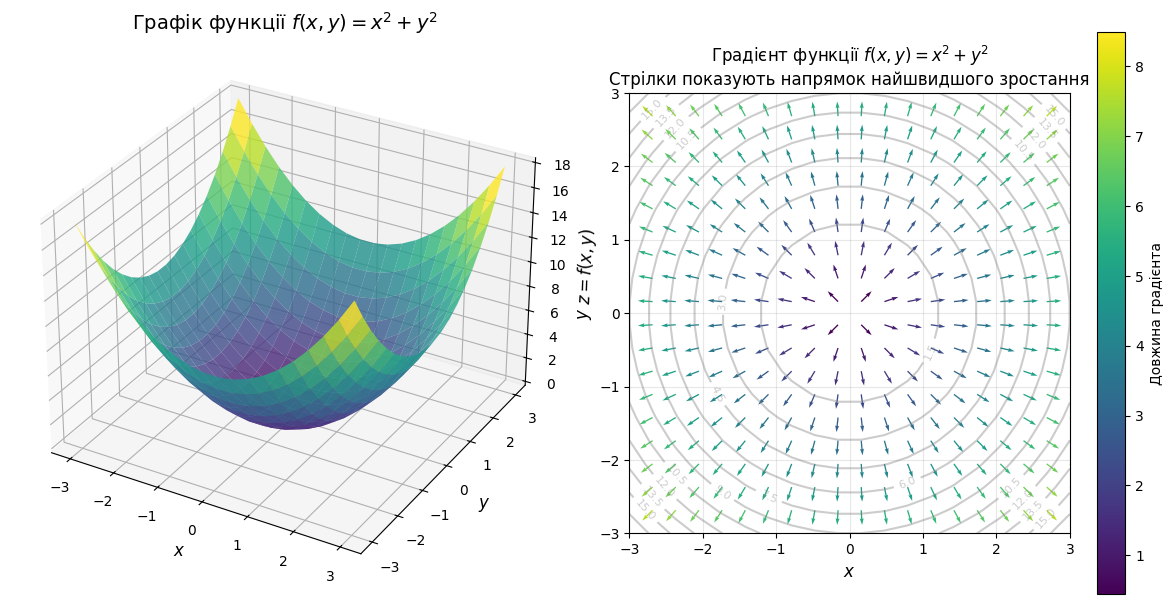

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функція f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Градієнт
def gradient(x, y):
    df_dx = 2*x
    df_dy = 2*y
    return df_dx, df_dy

# Створення сітки
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Обчислення градієнта в кожній точці
U, V = gradient(X, Y)

# Побудова графіка
fig = plt.figure(figsize=(12, 6)) # Збільшено розмір для двох графіків

# Перший графік — 3D поверхня (ax1)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('$x$', fontsize=12)
ax1.set_ylabel('$y$', fontsize=12)
ax1.set_zlabel('$z = f(x,y)$', fontsize=12)
ax1.set_title('Графік функції $f(x,y) = x^2 + y^2$', fontsize=14)

# Другий графік — Лінії рівня та векторне поле градієнта (ax2)
ax2 = fig.add_subplot(122)

# Лінії рівня
contour = ax2.contour(X, Y, Z, levels=15, colors='gray', alpha=0.4)
ax2.clabel(contour, inline=True, fontsize=8)

# Векторне поле градієнта
# Нормалізуємо довжину стрілок для кращої візуалізації
magnitude = np.sqrt(U**2 + V**2)
U_normalized = U / (magnitude + 1e-10)
V_normalized = V / (magnitude + 1e-10)

quiver = ax2.quiver(X, Y, U_normalized, V_normalized, magnitude,
                    cmap='viridis', scale=30, width=0.003)

fig.colorbar(quiver, ax=ax2, label='Довжина градієнта') # Прив'язуємо colorbar до ax2
ax2.set_xlabel('$x$', fontsize=12)
ax2.set_ylabel('$y$', fontsize=12)
ax2.set_title('Градієнт функції $f(x,y) = x^2 + y^2$\nСтрілки показують напрямок найшвидшого зростання', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal') # Забезпечуємо однакові пропорції для кращої візуалізації векторів

plt.tight_layout() # Автоматичне налаштування відступів між підграфіками
plt.show()

### Приклад 15. Обчислимо градієнт функції $f(x, y) = x^2 y + y^3$ в точці (2, 1).

In [ ]:
import numpy as np
from scipy.optimize import approx_fprime

# Функція f(x, y) = x^2*y + y^3
def f(coords):
    x, y = coords
    return x**2 * y + y**3

# Точка
point = np.array([2.0, 1.0])

# Обчислення градієнта
gradient = approx_fprime(point, f, epsilon=1e-8)

print(f"Градієнт в точці ({point[0]}, {point[1]}): {gradient}")
print(f"∇f = ({gradient[0]:.6f}, {gradient[1]:.6f})")

# Довжина градієнта
magnitude = np.linalg.norm(gradient)
print(f"Довжина градієнта: |∇f| = {magnitude:.6f}")

# Одиничний вектор в напрямку градієнта
direction = gradient / magnitude
print(f"Напрямок найшвидшого зростання: ({direction[0]:.6f}, {direction[1]:.6f})")

Градієнт в точці (2.0, 1.0): [4. 7.]
∇f = (4.000000, 7.000000)
Довжина градієнта: |∇f| = 8.062258
Напрямок найшвидшого зростання: (0.496139, 0.868243)


Візуалізуємо градієнт в цій точці

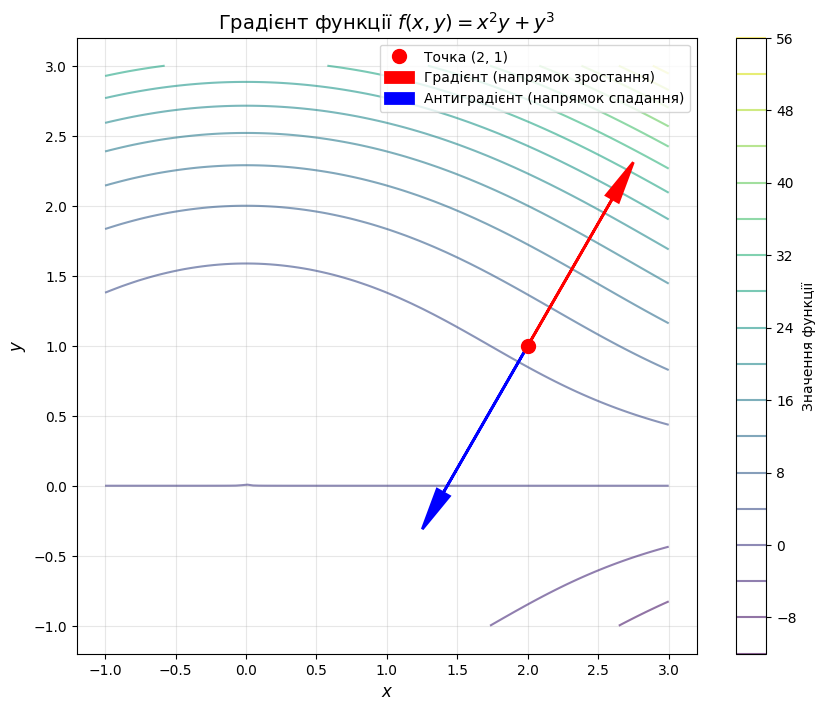

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime

# Функція
def f(coords):
    x, y = coords
    return x**2 * y + y**3

# Створення сітки для ліній рівня
x_grid = np.linspace(-1, 3, 100)
y_grid = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = f([X[i, j], Y[i, j]])

# Точка, в якій обчислюємо градієнт
point = np.array([2.0, 1.0])
gradient = approx_fprime(point, f, epsilon=1e-8)

# Побудова графіка
plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
plt.colorbar(label='Значення функції')

# Градієнт в точці
plt.plot(point[0], point[1], 'ro', markersize=10, label='Точка (2, 1)', zorder=10)

# Scaling factor for arrow length and head size
arrow_scale = 0.15
head_width = 0.1
head_length = 0.3

plt.arrow(point[0], point[1], gradient[0]*arrow_scale, gradient[1]*arrow_scale,
          head_width=head_width, head_length=head_length, fc='red', ec='red', linewidth=2, zorder=5,
          label='Градієнт (напрямок зростання)')

plt.arrow(point[0], point[1], -gradient[0]*arrow_scale, -gradient[1]*arrow_scale,
          head_width=head_width, head_length=head_length, fc='blue', ec='blue', linewidth=2, zorder=5,
          label='Антиградієнт (напрямок спадання)')

plt.xlabel('$x$', fontsize=12)
plt.ylabel('$y$', fontsize=12)
plt.title('Градієнт функції $f(x,y) = x^2y + y^3$', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.xlim(-1.2, 3.2)
plt.ylim(-1.2, 3.2)
plt.show()